In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_dir = '/Users/shivyucel/Documents/projects/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [2]:
clean_time = gpd.read_file(data_dir + 'clean_files/clean_times/clean_times.shp')
clean_time.to_crs(epsg=4326, inplace=True)

opioid_data = pd.read_csv(data_dir + 'opioid_calls/opioid_calls.csv')
neighbourhoods = gpd.read_file(data_dir + 'neighbourhoods/Neighbourhoods - historical 140.shp')

In [3]:
#clean neighbourhood list

neighbourhoods['FIELD_7'] = [x.split(' ')[:-1] for x in neighbourhoods['FIELD_7']]

lst = []
for item in neighbourhoods['FIELD_7'].values:
    clean = ' '.join(map(str, item))
    lst.append(clean)
    
neighbourhoods['FIELD_7'] = lst

In [4]:
opioid_shp = opioid_data.merge(neighbourhoods, left_on='neighbourhood', right_on='FIELD_7')

In [5]:
opioid_shp = gpd.GeoDataFrame(opioid_shp, crs = "EPSG:4326")

In [6]:
opioid_shp['call_count'].sum()

3255

In [7]:
opioid_shp['call_pct'] = [x/3255 for x in opioid_shp['call_count']]

In [8]:
opioid_shp['user_estimate'] = opioid_shp['call_pct'] * 52813

<AxesSubplot:>

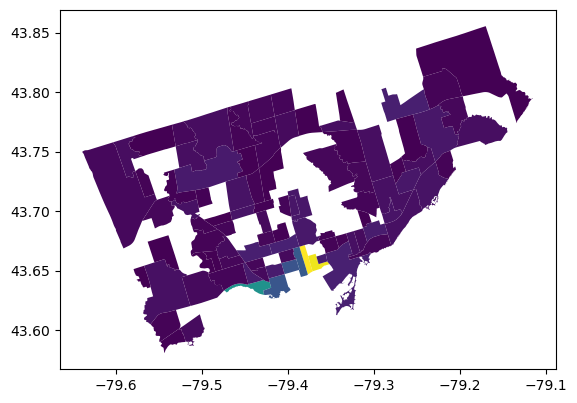

In [9]:
opioid_shp.plot(column='call_count')

In [10]:
clean_time['DA_area'] = [x.area for x in clean_time['geometry']]

In [11]:
opioid_DAs = opioid_shp.overlay(clean_time)

In [12]:
opioid_DAs['overlay_area'] = [x.area for x in opioid_DAs['geometry']]

In [13]:
opioid_DAs = opioid_DAs[opioid_DAs['overlay_area'] >= opioid_DAs['DA_area'] * 0.9]

In [14]:
opioid_DAs.columns

Index(['#', 'neighbourhood', 'call_count', 'FIELD_1', 'FIELD_2', 'FIELD_3',
       'FIELD_4', 'FIELD_5', 'FIELD_6', 'FIELD_7', 'FIELD_8', 'FIELD_9',
       'FIELD_10', 'FIELD_11', 'call_pct', 'user_estimate', 'wed_0800',
       'sat_0900', 'wed_1100', 'wed_1500', 'DAUID', 'reg_name', 'area_km',
       'pop', 'avg_inc', 'pop_nocar', 'low_inc', 'DA_area', 'geometry',
       'overlay_area'],
      dtype='object')

In [15]:
opioid_DAs

,#,neighbourhood,call_count,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,...,DAUID,reg_name,area_km,pop,avg_inc,pop_nocar,low_inc,DA_area,geometry,overlay_area
0,1,Church-Yonge Corridor,498,48,2501239,26022434,None,75,75,Church-Yonge Corridor,...,35200821,Toronto,0.03358,637,64587.0,279.673182,110.0,0.000004,"POLYGON ((-79.37298 43.65305, -79.37283 43.652...",0.000004
2,1,Church-Yonge Corridor,498,48,2501239,26022434,None,75,75,Church-Yonge Corridor,...,35200822,Toronto,0.07587,907,111754.0,286.386242,80.0,0.000008,"POLYGON ((-79.37237 43.65153, -79.37227 43.651...",0.000008
5,5,Bay Street Corridor,142,44,2501243,26022438,None,76,76,Bay Street Corridor,...,35200855,Toronto,0.47266,1242,170336.0,392.808239,180.0,0.000053,"POLYGON ((-79.37898 43.65169, -79.37874 43.651...",0.000053
8,9,Annex,51,130,2501157,26022352,None,95,95,Annex,...,35202820,Toronto,0.12036,1328,220970.0,391.297444,290.0,0.000013,"POLYGON ((-79.38722 43.67130, -79.38716 43.671...",0.000013
11,18,Rosedale-Moore Park,37,26,2501261,26022456,None,98,98,Rosedale-Moore Park,...,35202821,Toronto,0.02637,932,61963.0,543.786853,225.0,0.000003,"POLYGON ((-79.38421 43.67080, -79.38572 43.670...",0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,111,Woodbine-Lumsden,5,40,2501247,26022442,None,60,60,Woodbine-Lumsden,...,35200515,Toronto,0.10763,476,82722.0,47.425034,25.0,0.000012,"POLYGON ((-79.31156 43.69362, -79.31227 43.695...",0.000012
3758,111,Woodbine-Lumsden,5,40,2501247,26022442,None,60,60,Woodbine-Lumsden,...,35200516,Toronto,0.06017,449,86456.0,60.085640,30.0,0.000007,"POLYGON ((-79.31377 43.69310, -79.31388 43.693...",0.000007
3759,111,Woodbine-Lumsden,5,40,2501247,26022442,None,60,60,Woodbine-Lumsden,...,35200517,Toronto,0.07467,521,81279.0,134.161019,50.0,0.000008,"POLYGON ((-79.31585 43.69280, -79.31608 43.693...",0.000008
3764,111,Woodbine-Lumsden,5,40,2501247,26022442,None,60,60,Woodbine-Lumsden,...,35200604,Toronto,0.06800,581,69733.0,213.250295,50.0,0.000008,"POLYGON ((-79.31424 43.68905, -79.31451 43.689...",0.000008


In [16]:
opioid_DAs.columns

Index(['#', 'neighbourhood', 'call_count', 'FIELD_1', 'FIELD_2', 'FIELD_3',
       'FIELD_4', 'FIELD_5', 'FIELD_6', 'FIELD_7', 'FIELD_8', 'FIELD_9',
       'FIELD_10', 'FIELD_11', 'call_pct', 'user_estimate', 'wed_0800',
       'sat_0900', 'wed_1100', 'wed_1500', 'DAUID', 'reg_name', 'area_km',
       'pop', 'avg_inc', 'pop_nocar', 'low_inc', 'DA_area', 'geometry',
       'overlay_area'],
      dtype='object')

In [17]:
neighbourhood_pops = opioid_DAs.groupby('FIELD_7')['pop'].sum().reset_index()
neighbourhood_pops.rename(columns={'pop':'neighbourhood_pop'}, inplace=True)
opioid_DAs = opioid_DAs.merge(neighbourhood_pops, on='FIELD_7')

In [18]:
opioid_DAs['DA_pop_pct'] = opioid_DAs['pop'] / opioid_DAs['neighbourhood_pop']

In [19]:
opioid_DAs['da_opioid_users'] = opioid_DAs['user_estimate'] * opioid_DAs['DA_pop_pct'] 

In [20]:
opioid_DAs['da_opioid_users'].sum()

52813.00000000001

In [21]:
import matplotlib

In [22]:
from matplotlib.colors import LogNorm, Normalize

In [23]:
clinics_gdf.to_crs(epsg=3857, inplace=True)
fig, ax = plt.subplots(figsize = (20, 10))
clinics_gdf.plot(ax=ax,markersize=100, color='red', alpha = 0.7)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)


NameError: name 'clinics_gdf' is not defined

In [24]:
opioid_DAs

,#,neighbourhood,call_count,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,...,pop,avg_inc,pop_nocar,low_inc,DA_area,geometry,overlay_area,neighbourhood_pop,DA_pop_pct,da_opioid_users
0,1,Church-Yonge Corridor,498,48,2501239,26022434,None,75,75,Church-Yonge Corridor,...,637,64587.0,279.673182,110.0,0.000004,"POLYGON ((-79.37298 43.65305, -79.37283 43.652...",0.000004,31340,0.020325,164.232698
1,1,Church-Yonge Corridor,498,48,2501239,26022434,None,75,75,Church-Yonge Corridor,...,907,111754.0,286.386242,80.0,0.000008,"POLYGON ((-79.37237 43.65153, -79.37227 43.651...",0.000008,31340,0.028941,233.844674
2,1,Church-Yonge Corridor,498,48,2501239,26022434,None,75,75,Church-Yonge Corridor,...,2119,106370.0,901.099728,270.0,0.000020,"POLYGON ((-79.37386 43.64863, -79.37384 43.648...",0.000020,31340,0.067613,546.325098
3,1,Church-Yonge Corridor,498,48,2501239,26022434,None,75,75,Church-Yonge Corridor,...,2527,60142.0,1764.640742,580.0,0.000005,"POLYGON ((-79.37991 43.66997, -79.37990 43.669...",0.000005,31340,0.080632,651.516528
4,1,Church-Yonge Corridor,498,48,2501239,26022434,None,75,75,Church-Yonge Corridor,...,1612,57096.0,897.813626,370.0,0.000003,"POLYGON ((-79.37945 43.66889, -79.37945 43.668...",0.000003,31340,0.051436,415.609277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593,97,Casa Loma,7,41,2501246,26022441,None,96,96,Casa Loma,...,331,340907.0,35.462886,50.0,0.000022,"POLYGON ((-79.40889 43.68152, -79.40796 43.681...",0.000022,9793,0.033800,3.838841
2594,97,Casa Loma,7,41,2501246,26022441,None,96,96,Casa Loma,...,393,268080.0,246.305692,50.0,0.000010,"POLYGON ((-79.40941 43.68056, -79.40902 43.679...",0.000010,9793,0.040131,4.557899
2595,97,Casa Loma,7,41,2501246,26022441,None,96,96,Casa Loma,...,749,146609.0,336.076899,105.0,0.000012,"POLYGON ((-79.41260 43.68667, -79.41259 43.686...",0.000012,9793,0.076483,8.686682
2596,97,Casa Loma,7,41,2501246,26022441,None,96,96,Casa Loma,...,483,312896.0,145.894142,40.0,0.000014,"POLYGON ((-79.41260 43.68669, -79.41282 43.687...",0.000014,9793,0.049321,5.601692


In [25]:
opioid_shp.to_crs(epsg=3857, inplace=True)
opioid_DAs.to_crs(epsg=3857, inplace=True)

In [52]:
opioid_DAs['da_opioid_users'].sum()

52813.00000000001

In [54]:
opioid_DAs[['DAUID', 'geometry', 'da_opioid_users']].to_file(data_dir + 'results/revisions/opioid_da_data/opioid_da_data.shp')
opioid_shp[['neighbourhood', 'call_count', 'geometry']].to_file(data_dir + 'results/revisions/opioid_call_data/opioid_call_data.shp')

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_26541/428807321.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  opioid_DAs[['DAUID', 'geometry', 'da_opioid_users']].to_file(data_dir + 'results/revisions/opioid_da_data/opioid_da_data.shp')
/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_26541/428807321.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  opioid_shp[['neighbourhood', 'call_count', 'geometry']].to_file(data_dir + 'results/revisions/opioid_call_data/opioid_call_data.shp')


In [29]:
import contextily as ctx
import matplotlib

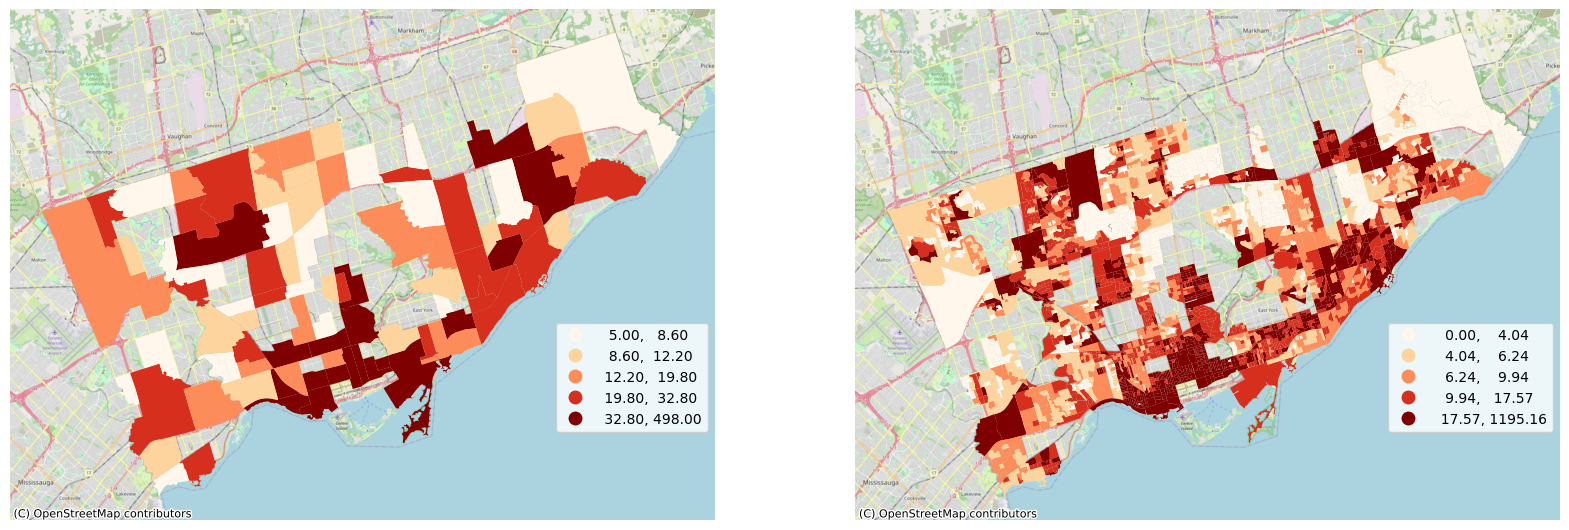

In [31]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))
opioid_shp.plot(column='call_count', ax=ax0, legend=True, scheme='quantiles', cmap='OrRd')
opioid_DAs.plot(column='da_opioid_users', ax=ax1, legend=True, scheme='quantiles', cmap='OrRd')
ctx.add_basemap(ax0, source=ctx.providers.OpenStreetMap.Mapnik)
ctx.add_basemap(ax1, source=ctx.providers.OpenStreetMap.Mapnik)

leg = ax0.get_legend()
leg.set_bbox_to_anchor((0., 0., 1, .4))

leg = ax1.get_legend()
leg.set_bbox_to_anchor((0., 0., 1, .4))

ax0.axis(False)
ax1.axis(False)

plt.savefig(data_dir + 'results/revisions/opioid_map.pdf')

In [32]:
clinics_gdf.to_crs(epsg=3857, inplace=True)
fig, ax = plt.subplots(figsize = (20, 10))
clinics_gdf.plot(ax=ax,markersize=100, color='red', alpha = 0.7)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)


NameError: name 'clinics_gdf' is not defined

<AxesSubplot:>

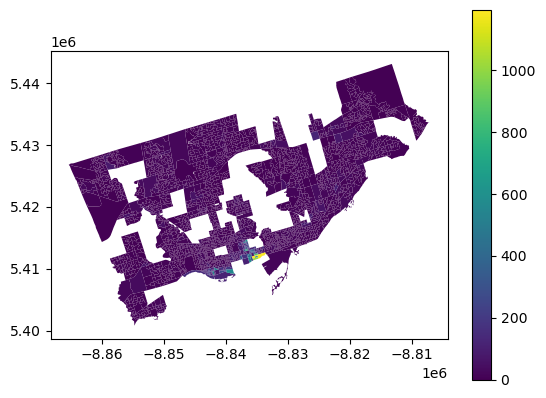

In [33]:
opioid_DAs.plot(column='da_opioid_users', legend=True)

In [57]:
opioid_DAs['da_opioid_users'].sum()

52813.00000000001

In [58]:
for_export = opioid_DAs[['DAUID', 'da_opioid_users']]

In [59]:
for_export.to_csv(data_dir + 'da_users.csv')

In [ ]:
opioid_

In [35]:
for_export

,DAUID,da_opioid_users
0,35200821,164.232698
1,35200822,233.844674
2,35204022,546.325098
3,35204578,651.516528
4,35204579,415.609277
...,...,...
2593,35202809,3.838841
2594,35202810,4.557899
2595,35202880,8.686682
2596,35202881,5.601692


In [36]:
travel_times = gpd.read_file('/Users/shivyucel/Documents/projects/opioid_accessibility/opioid_accessibility/data/toronto_data/results/travel_time_diff/travel_time_diff_2.shp')

In [38]:
msdi = pd.read_excel(data_dir + 'deprivation_data/MSDI.xlsx', sheet_name='DATA')

/Users/shivyucel/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [39]:
full_table = clean_time.merge(msdi, left_on='DAUID', right_on='DA')

In [40]:
full_table.columns

Index(['wed_0800', 'sat_0900', 'wed_1100', 'wed_1500', 'DAUID', 'reg_name',
       'area_km', 'pop', 'avg_inc', 'pop_nocar', 'low_inc', 'geometry',
       'DA_area', 'DA', 'DAPOP2016', 'MUNIC', 'PR', 'CR', 'CMA', 'ZONE', 'ZIM',
       'SCOREMAT', 'SCORESOC', 'QUINTMAT', 'QUINTSOC', 'CentMat', 'CentSoc',
       'QUINTMATCR', 'QUINTSOCCR', 'QUINTMATZONE', 'QUINTSOCZONE',
       'QUINTMATCMA', 'QUINTSOCCMA'],
      dtype='object')

In [41]:
full_table['mat_quant'] = pd.qcut(full_table['SCOREMAT'], 5, labels= [1,2,3,4,5])
full_table['soc_quant'] = pd.qcut(full_table['SCORESOC'], 5, labels= [1,2,3,4,5])
               

In [42]:
full_table['mat_quant'] = full_table.mat_quant.cat.codes + 1
full_table['soc_quant'] = full_table.soc_quant.cat.codes + 1

## 20-Minute Thresholds
### Wednesday 

In [47]:
full_table['pop'].sum()

2731571

In [43]:
thres_20 = travel

NameError: name 'travel' is not defined

In [63]:
full_table

,wed_0800,sat_0900,wed_1100,wed_1500,DAUID,reg_name,area_km,pop,avg_inc,pop_nocar,...,CentMat,CentSoc,QUINTMATCR,QUINTSOCCR,QUINTMATZONE,QUINTSOCZONE,QUINTMATCMA,QUINTSOCCMA,mat_quant,soc_quant
0,0.0,0.0,-3.0,-1.0,35200002,Toronto,0.05037,356,79431.0,55.071330,...,72.0,24.0,4.0,2.0,4.0,2.0,4.0,2.0,4,2
1,1.0,0.0,-3.0,-1.0,35200003,Toronto,0.04675,335,97695.0,0.000000,...,67.0,5.0,4.0,1.0,4.0,1.0,4.0,1.0,3,1
2,0.0,0.0,-3.0,-2.0,35200004,Toronto,0.04878,384,66349.0,0.000000,...,96.0,3.0,5.0,1.0,5.0,1.0,5.0,1.0,5,1
3,-1.0,0.0,-3.0,-1.0,35200005,Toronto,0.04429,408,97356.0,0.000000,...,96.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5,1
4,-1.0,0.0,-3.0,-1.0,35200006,Toronto,0.05717,527,80188.0,0.000000,...,82.0,8.0,5.0,1.0,4.0,1.0,4.0,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,0.0,0.0,0.0,0.0,35204902,Toronto,0.01994,498,55037.0,321.265496,...,6.0,72.0,1.0,4.0,1.0,3.0,1.0,3.0,1,4
3698,2.0,3.0,2.0,3.0,35204903,Toronto,0.63493,3495,48495.0,494.285900,...,39.0,76.0,2.0,4.0,3.0,4.0,3.0,4.0,2,4
3699,2.0,2.0,1.0,2.0,35204904,Toronto,0.08969,626,51243.0,292.351880,...,58.0,79.0,3.0,4.0,3.0,4.0,3.0,5.0,3,4
3700,1.0,1.0,1.0,1.0,35204905,Toronto,1.08844,1774,50783.0,307.684076,...,12.0,96.0,1.0,5.0,1.0,5.0,1.0,5.0,2,5
